In [69]:
import pandas as pd
import numpy as np

# Sample mixed data
data = {
    'Cabin': [ '', '323WE', 'B22', 'D10', 'A34'],
    'Ticket': ['A5 354', 'PC 205','STON 765',2123,3897],   
    'Number': ['C', '5', 'B', '6', 'A'],
    'Survived': [1, 0, 1, 0, 1]                    
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('mixed.csv', index=False)

print("CSV file 'mixed.csv' created successfully!")


CSV file 'mixed.csv' created successfully!


In [70]:
df = pd.read_csv('mixed.csv')

In [71]:
df.head(2)

,Cabin,Ticket,Number,Survived
0,NaN,A5 354,C,1
1,323WE,PC 205,5,0


In [72]:
df['Number'].unique()

array(['C', '5', 'B', '6', 'A'], dtype=object)

Text(0.5, 1.0, 'Passenger travelling')

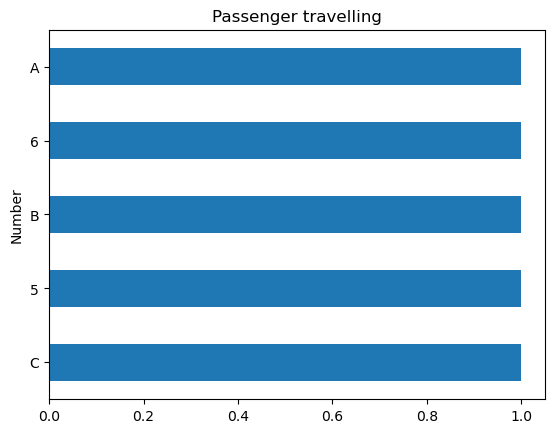

In [73]:
fig = df['Number'].value_counts().plot.barh()
fig.set_title("Passenger travelling")

In [74]:
df['Number_numberical'] = pd.to_numeric(df['Number'],errors='coerce',downcast='integer')

In [75]:
df['Number_numberical'] = np.where(df['Number_numberical'].isnull(),df['Number'],np.nan)

In [76]:
df.head()

,Cabin,Ticket,Number,Survived,Number_numberical
0,NaN,A5 354,C,1,C
1,323WE,PC 205,5,0,NaN
2,B22,STON 765,B,1,B
3,D10,2123,6,0,NaN
4,A34,3897,A,1,A


In [77]:
df['Cabin'].unique()

array([nan, '323WE', 'B22', 'D10', 'A34'], dtype=object)

In [78]:
df['Ticket'].unique()

array(['A5 354', 'PC 205', 'STON 765', '2123', '3897'], dtype=object)

In [79]:
df['Cabin_num'] = df['Cabin'].str.extract('(\d+)')
df['Cabin_cat'] = df['Cabin'].str[0]

df.head()

,Cabin,Ticket,Number,Survived,Number_numberical,Cabin_num,Cabin_cat
0,NaN,A5 354,C,1,C,NaN,NaN
1,323WE,PC 205,5,0,NaN,323,3
2,B22,STON 765,B,1,B,22,B
3,D10,2123,6,0,NaN,10,D
4,A34,3897,A,1,A,34,A


In [80]:
df['Cabin_cat'].count()

4

In [81]:
df['Cabin_num'].count()

4

In [85]:
df.isna()

,Cabin,Ticket,Number,Survived,Number_numberical,Cabin_num,Cabin_cat
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [83]:
df.fillna('1',inplace=True)

<Axes: xlabel='Cabin_cat'>

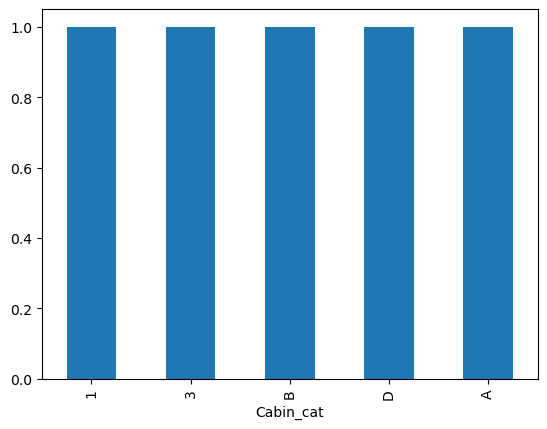

In [84]:
df['Cabin_cat'].value_counts().plot(kind='bar')

In [86]:
# extract the last bit of ticket as number

df['Ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'],
                                errors ='coerce',
                                downcast='integer')

# extract the first part of ticket as category

df['Ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['Ticket_cat'] = np.where(df['Ticket_cat'].str.isdigit(),np.nan,
                           df['Ticket_cat'])

In [87]:
df.head()

,Cabin,Ticket,Number,Survived,Number_numberical,Cabin_num,Cabin_cat,Ticket_num,Ticket_cat
0,1,A5 354,C,1,C,1,1,354,A5
1,323WE,PC 205,5,0,1,323,3,205,PC
2,B22,STON 765,B,1,B,22,B,765,STON
3,D10,2123,6,0,1,10,D,2123,NaN
4,A34,3897,A,1,A,34,A,3897,NaN
